# [LEGALST-123] Lab 05: Central Limit Theorem, Confidence Intervals, Hypothesis Testing

In [24]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by allowing students to contextualize the statistical ideas of the Central Limit Theorem and hypothesis testing by using a dataset containing continuous variables. 

**Data & EDA**: 
... explanation needed ... 

**Bootsrapping**:
... explanation needed ... 

**Hypothesis Testing**
... explanation needed ... 

**Confidence Interval**: 
... explanation needed ... 

**Central Limit Theorem**: 
... explanation needed ... 

<br/>

<hr style="border: 1px solid #fdb515;" />

## Data

For this lab, we'll be using the same datasets used in our previous labs, the Nashville's police stops dataset. Run the following cell below to read the `DataFrame`.

In [6]:
# Issue loading; Will work in Datahub.
# stops = pd.read_csv("https://github.com/ds-modules/data/raw/main/nashville_sample.csv")

#user = "suminpark" #insert your user name
#path = "/Users/" + user +  "/Documents/GitHub/Modules/Legalst-123/labs/data" #edit this later for the actual lab. 
user = "fionaaaaa_mei" #insert your user name
path = "/Users/" + user +  "/Documents/GitHub/Legalst-123/labs/data" #edit this later for the actual lab. 
stops = pd.read_csv(path + "/stops_sample.csv", index_col = 0)
stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


## 1. Exploratory Data Analysis

Let's refer back to our last lab, when we explored different distributions using histogram. In particular, we looked at distribution of stops counts for `"subject_sex"` and `"subject_age"`. For this notebook, let's look at the distribution of **FIND WHAT SUBJECT WE WANT TO FIND**!!!

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.1**:
Before explore these variables, let's clean the dataset. In the code cell below, drop any columns that has "raw" in their column names. Then, drop the rows with *any* null values EXCEPT for the columns` "contraband_found"`, `"contraband_drugs"`, `"contraband_weapons"`, `"search_basis"`, and `"notes"`.
</div>

Hint 1: Look at lab 04 question 1.1 and question 1.2! It should be very similar. 

In [ ]:
# YOUR ANSWER HERE. You can use less or more lines than provided below. 
# ... 
# ... 
# ...
# stops = ...

# stops.head(5)

In [9]:
#SOLUTION 
raw_columns = [col for col in stops.columns if 'raw_' in col]
necessary_cols = stops.columns.drop(["contraband_found", "contraband_drugs", "contraband_weapons", "search_basis", "notes"]) #SOLUTION 
stops = stops.dropna(subset=necessary_cols,axis=0)
stops = stops.drop(raw_columns, axis=1)

stops.head(5)

,index,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes
1,492044,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,45.0,...,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,tail light out
2,431170,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,21.0,...,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NaN
3,2066423,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,35.0,...,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,NaN
5,543402,2012-12-13,67560.0,"3RD AVE S & ASH ST, NASHVILLE, TN, 37210",36.152786,-86.770562,4.0,4005.0,425.0,26.0,...,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,RAN STOP SIGN
6,1446083,2012-02-26,55380.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,18.0,...,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NaN


Let's explore the column `"subject_race"` and `"subject_age"`. For convenience, we have provided a code below showing what race/ethincity categories exists within the column  `"subject_race"`. For this particular question, let's look at the distribution of people who are categorized as `'hispanic'` or `'white'` for the `"subject_race"`. 

In [10]:
stops["subject_race"].unique()

array(['black', 'white', 'hispanic', 'unknown', 'asian/pacific islander',
       'other'], dtype=object)

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.2**:

Write code that plots a histogram of age distribution specifically for people who are categorized as Hispanic. Assign `subject_hispanic` to the table manipulation you do before plotting histogram. 

</div>

In [ ]:
# YOUR CODE HERE

# subject_hispanic = ... 

# Histogram

**What is the shape of the plot?**

_YOUR ANSWER HERE_

**Find the 25th, 50th, 75th percentile below.**

In [ ]:
# YOUR CODE HERE
# Find the 25th percentile

In [ ]:
# Find the 50th percentile

In [ ]:
# Find the 75th percentile

**From our histogram and different percentiles, what does this distribution tell you about age distribution of Police stops among Hispanic group?** 

_YOUR ANSWER HERE_

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.3**:

Now, do the same process for people who are categorized as White. Assign `subject_white` to the table manipulation you do before plotting histogram. 

</div>

In [ ]:
# YOUR CODE HERE

# subject_white = ... 

# Histogram

**What is the shape of the plot?**

_YOUR ANSWER HERE_

**Find the 25th, 50th, 75th percentile below.**

In [ ]:
# YOUR CODE HERE
# Find the 25th percentile

In [ ]:
# Find the 50th percentile

**How do the two distributions compare?**

_YOUR ANSWER HERE_

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.4**:

Create an overlaid historgram comparing the two distributions.

</div>

In [ ]:
# YOUR ANSWER HERE

ONE MORE CONTEXTUAL QUESTION within Q1.4 HERE REGARDING TWO DISTRIBUTION.

## 2. Forming a Hypothesis


Hypothesis testing is a fundamental statistical method used to make inferences about a population based on a sample of data. 

To formulate a hypothesis, researchers typically start with a null hypothesis (H0) that posits no effect or no difference, and an alternative hypothesis (H1) suggesting a specific effect or difference. 

The null hypothesis serves as a benchmark for comparison, while the alternative hypothesis represents the claim researchers seek to support. The process involves collecting data and assessing its compatibility with the null hypothesis through statistical analysis. 

If the observed data significantly deviates from what would be expected under the null hypothesis, researchers may reject the null hypothesis in favor of the alternative, concluding that there is evidence to support their claim. Conversely, if the data does not provide sufficient evidence, the null hypothesis is retained. Hypothesis testing provides a structured framework for drawing conclusions and making informed decisions in scientific research and data analysis.

Just as a start up example, if we want to look at the distribution of age between the white population and the hispanic population

**Null Hypothesis (H0)**: There is no significant difference in the distribution of age between the white population and the hispanic population.

**Alternative Hypothesis (H1)**: There is a significant difference in the distribution of age between the white population and the hispanic population.

In this example, the null hypothesis assumes that there is no variation in age distribution across various racial groups, suggesting that any observed differences are due to random chance. The alternative hypothesis, on the other hand, posits that there is a significant difference in the distribution of age among these racial groups. Researchers would conduct a statistical analysis on age data from different races to determine whether the evidence supports rejecting the null hypothesis in favor of the alternative, indicating that there is a meaningful distinction in age distribution between these two race population. 

For the rest of this lab, we want to look at the distribution of time of day stopped between the black population and the hispanic population, write the null and alternative hypothesis by yourself below. 
Refer back to the previous question if you are feeling stuck!

Null Hypothesis: **Your Answer Here**

Alternative Hypothesis: **Your Answer Here**


## 3. Bootstrapping and Confidence Interval

Bootstrapping is a statistical technique that allows us to make educated guesses about a population using only a small sample from that population. It works by repeatedly taking small random samples from the data we have and then using these samples to estimate things like averages, variances, or other statistics, as if we had data for the entire population. This technique helps us understand how uncertain or variable our estimates are and is especially useful when we have limited data.


###  A Random Sample and an Estimate
Let's first Draw from the sample, at random with replacement, the same number of times as the original sample size.

It is important to resample the same number of times as the original sample size. The reason is that the variability of an estimate depends on the size of the sample. ]

If we drew  at random without replacement with the same size as out sample size, we would just get the same sample back. By drawing with replacement, we create the possibility for the new samples to be different from the original, because some participants might be drawn more than once and others not at all.

Text(0.5, 1.0, 'Histogram of time stopped among hispanic and black population')

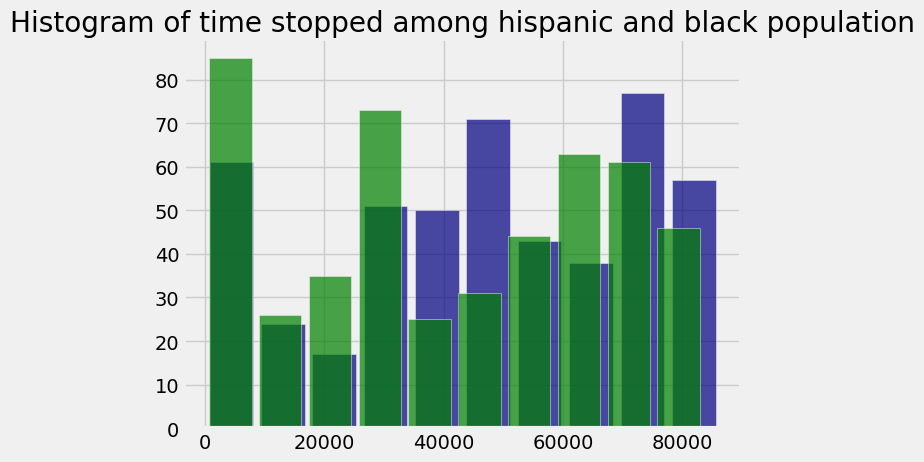

In [37]:
#fill out the blanks in this skeleton code
b_resampled = stops[stops['subject_race'] == 'black'].sample(len(stops['subject_race'] == 'black'), replace = True)
h_resampled = stops[stops['subject_race'] == 'hispanic'].sample(len(stops['subject_race'] == 'hispanic'), replace = True)

plt.hist(b_resampled['time'], bins='auto', color='navy', alpha=0.7, rwidth=0.85)

plt.hist(h_resampled['time'], bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.title('Histogram of time stopped among hispanic and black population')


In [38]:
#Now let's calculate the median difference between the two datasets that we drew
#If you run this multiple time, you will see that we get different results
resample_median = percentile(50, b_resampled['time']) - percentile(50, h_resampled['time'])
resample_median


5400.0

### Resampling from the Sample

By resampling again and again, we can get many such estimates, and hence an `empirical distribution` of the estimates.

Let us collect this code and define a function one_bootstrap_median that returns one bootstrapped median of total compensation, based on bootstrapping our original dataset

In [40]:
def one_bootstrap_median():
    b_resampled = stops[stops['subject_race'] == 'black'].sample(len(stops['subject_race'] == 'black'), replace = True)
    h_resampled = stops[stops['subject_race'] == 'hispanic'].sample(len(stops['subject_race'] == 'hispanic'), replace = True)
    bootstrapped_median = percentile(50, b_resampled['time']) - percentile(50, h_resampled['time'])
    return bootstrapped_median

Run the cell below a few times to see how the bootstrapped medians vary. Remember that each of them is an estimate of the population median.

In [44]:
one_bootstrap_median()

7680.0

We can now repeat the bootstrap process multiple times by running a `for` loop as usual. In each iteration, we will call the function `one_bootstrap_median` to generate one value of the bootstrapped median based on our original dataset. Then we will append the boostrapped median to the collection array `bstrap_medians`.

Let's do 2000 repetitions for this round of bootstrapping! (since this is a large number the code might take a while to run)

In [47]:
num_repetitions = 2000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append (bstrap_medians, one_bootstrap_median())

Now let's visualize what we got from the bootstrapped process

Text(0, 0.5, 'Frequency')

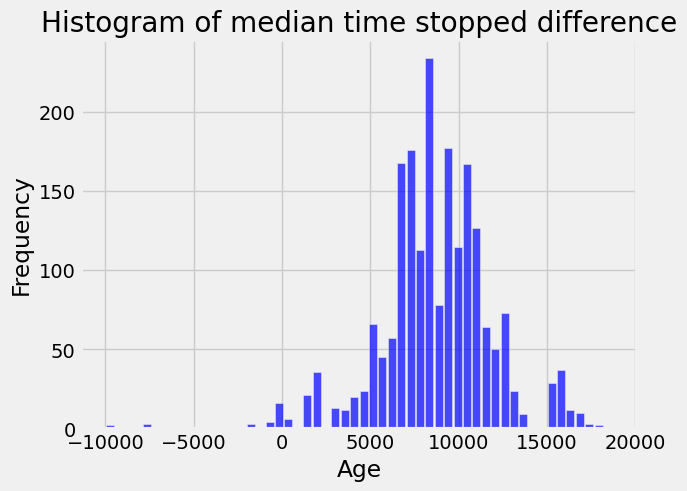

In [48]:
plt.hist(bstrap_medians, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of median time stopped difference')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Confidence Interval

Confidence interval is an important tool in hypothesis testing. It helps us figure out if the observed effect is statistically important. If the interval has zero in it, we don't have enough evidence to reject the null hypothesis. But if zero is not in the interval, it means  we can reject the hypothesis and states that there are significant differences between these two racial groups. This information guides our decisions with more accuracy.

In this lab we will be using the 95% confident interval (the 2.5th to 97.5th interval) to see if the parameter is included. 

In [49]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([  1260.,  15660.])

Now let's add the confidence interval to the histogram above

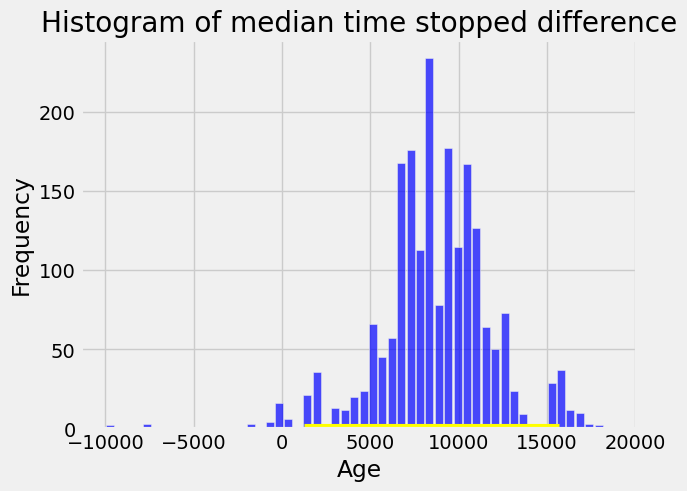

In [50]:
plt.hist(bstrap_medians, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of median time stopped difference')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.plot([left, right], [0, 0], color='yellow', lw=8);

As you can see from the graph and the confident interval we got, 0 is not include in the 95% confidence interval. As a result, we can say that there is a significant difference between the two racial groups and reject the null hypothesis. 

## 4. Central Limit Theorem (CLT)